In [1]:
#군집 모델 실습 
#using sklearn model 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../dataset/exercise3.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot: xlabel='Gender', ylabel='count'>

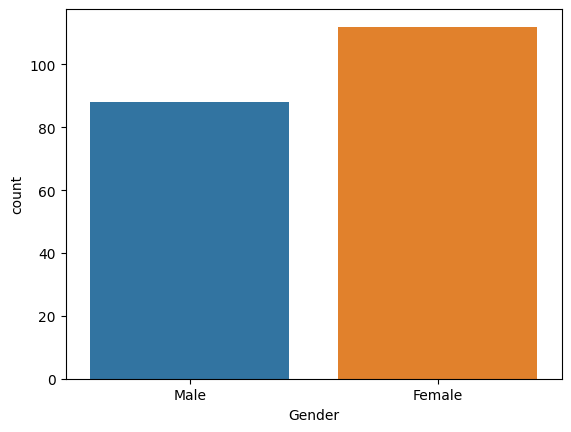

In [7]:
sns.countplot(x=df['Gender'])

<AxesSubplot: xlabel='Gender', ylabel='Annual Income (k$)'>

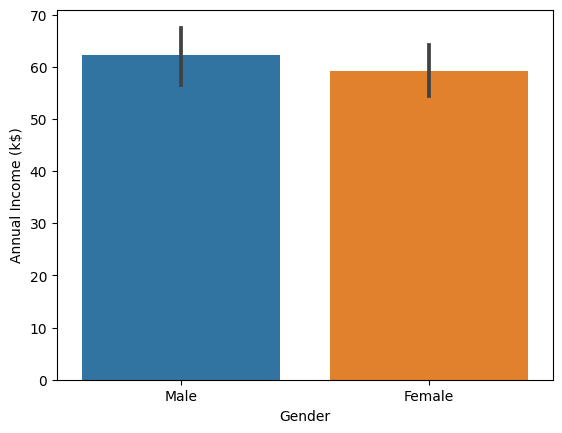

In [10]:
sns.barplot(x = 'Gender', y = 'Annual Income (k$)', data = df)

<AxesSubplot: xlabel='Gender', ylabel='Spending Score (1-100)'>

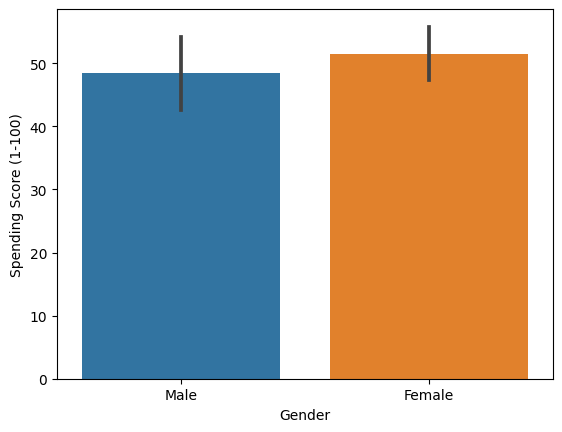

In [11]:
sns.barplot(x= 'Gender', y = 'Spending Score (1-100)', data = df)

<AxesSubplot: xlabel='Age', ylabel='Annual Income (k$)'>

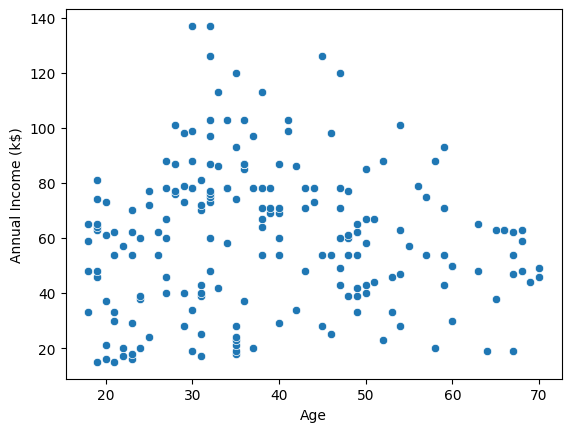

In [12]:
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)',data = df)

<AxesSubplot: xlabel='Age', ylabel='Spending Score (1-100)'>

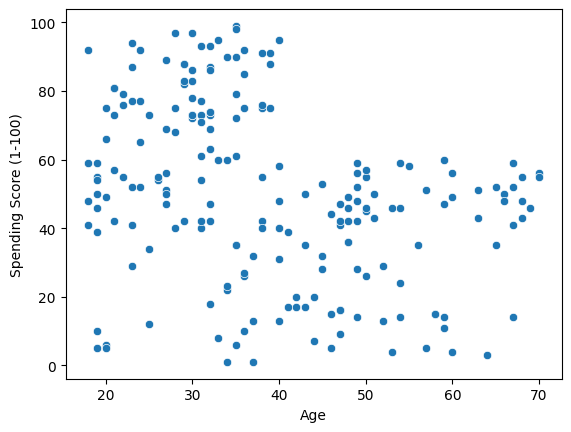

In [13]:
sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)',data = df)

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

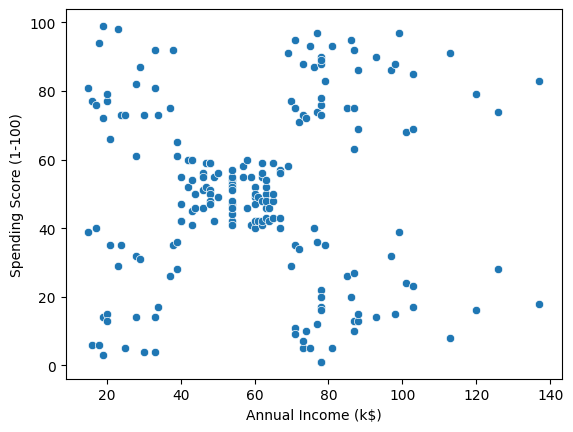

In [14]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',data = df)

## Implementation

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score # 실루엣 점수 1에 가까우면 good

X = df.iloc[:,3:]
sc = StandardScaler()
X = sc.fit_transform(X)

model = KMeans(n_clusters = 2, random_state = 23)
y_preds = model.fit_predict(X)

df['cluster'] = y_preds

print('실루엣 점수 : {0:.4f}'.format(silhouette_score(X, y_preds)))

실루엣 점수 : 0.5282


/home/qkrwnstj/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

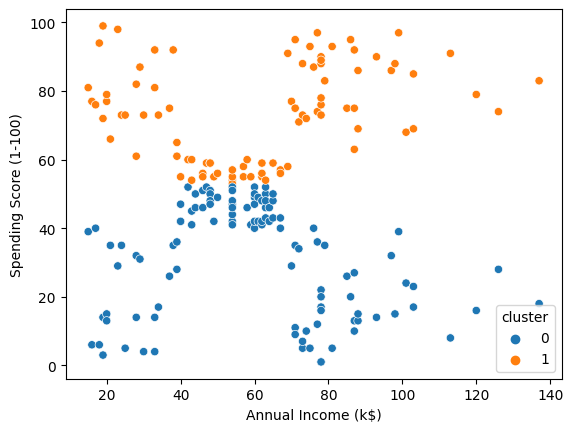

In [28]:
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', data = df, hue = 'cluster')

In [29]:
silhouette_avg = []
for k in range(10):
    model = KMeans(n_clusters = k +2, random_state = 23)
    y_preds = model.fit_predict(X)
    score = silhouette_score(X, y_preds)
    silhouette_avg.append(score)
    print("군집개수 : {0}개, 평균 실루엣 점수: {1:.4f}".format(k+2, score))

/home/qkrwnstj/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/qkrwnstj/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집개수 : 2개, 평균 실루엣 점수: 0.5282
군집개수 : 3개, 평균 실루엣 점수: 0.4919


/home/qkrwnstj/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/qkrwnstj/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집개수 : 4개, 평균 실루엣 점수: 0.5111
군집개수 : 5개, 평균 실루엣 점수: 0.5453


/home/qkrwnstj/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/qkrwnstj/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집개수 : 6개, 평균 실루엣 점수: 0.5577
군집개수 : 7개, 평균 실루엣 점수: 0.5522


/home/qkrwnstj/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/qkrwnstj/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집개수 : 8개, 평균 실루엣 점수: 0.5413
군집개수 : 9개, 평균 실루엣 점수: 0.5055


/home/qkrwnstj/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/qkrwnstj/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집개수 : 10개, 평균 실루엣 점수: 0.5112
군집개수 : 11개, 평균 실루엣 점수: 0.4774


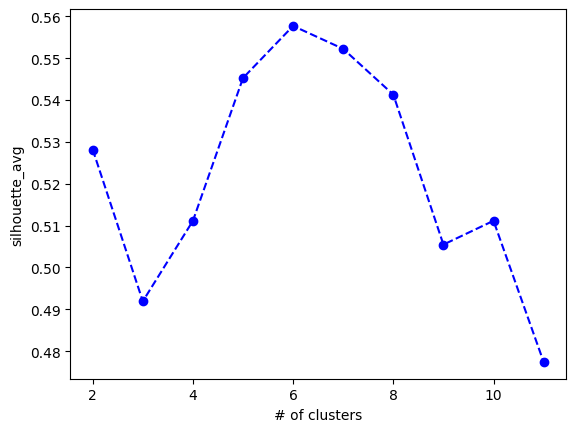

In [31]:
plt.plot(range(2,12), silhouette_avg, 'bo--')
plt.xlabel('# of clusters')
plt.ylabel('silhouette_avg')
plt.show()

In [32]:
model = KMeans(n_clusters=5, random_state = 23)
y_preds = model.fit_predict(X)
df['cluster'] = y_preds

/home/qkrwnstj/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

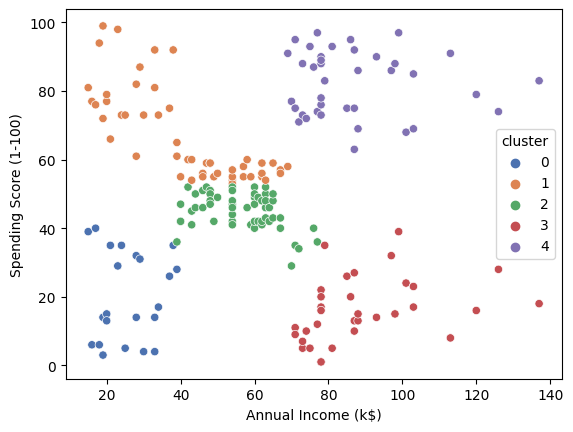

In [33]:
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', data = df, hue = 'cluster', palette="deep")

<AxesSubplot: xlabel='cluster', ylabel='Spending Score (1-100)'>

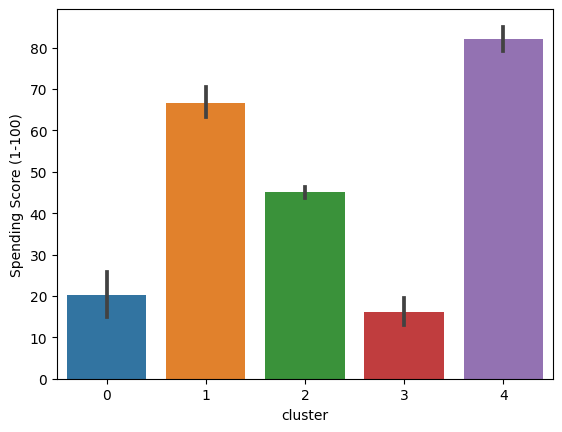

In [34]:
sns.barplot(x = 'cluster', y = 'Spending Score (1-100)', data = df)

<AxesSubplot: xlabel='cluster', ylabel='Annual Income (k$)'>

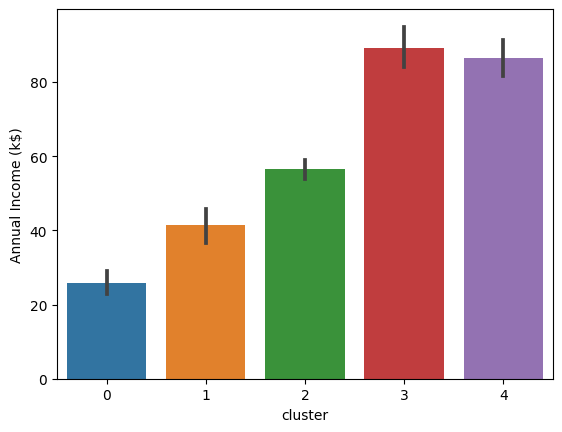

In [35]:
sns.barplot(x = 'cluster', y = 'Annual Income (k$)',data =df)

<AxesSubplot: xlabel='cluster', ylabel='count'>

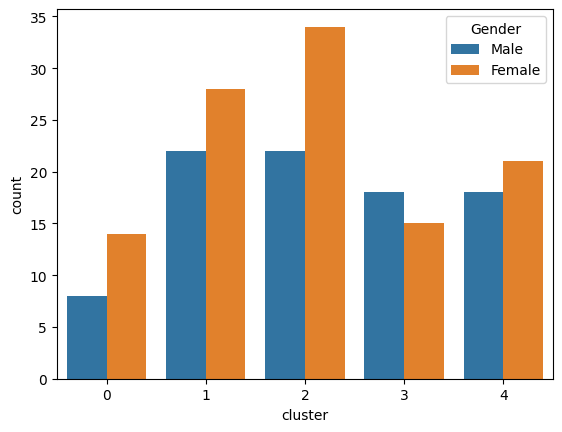

In [38]:
sns.countplot(x = 'cluster', data =df, hue = 'Gender')

<AxesSubplot: xlabel='cluster', ylabel='Age'>

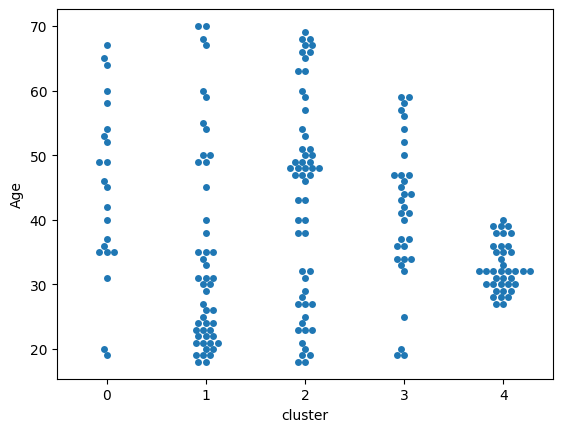

In [39]:
sns.swarmplot(x = 'cluster', y = 'Age', data = df)